In [1]:
from IPython.display import HTML

# Toggle button and custom styling
display(HTML('''
<script>
    const toggleCode = () => {
        const selectors = ['.jp-InputArea', '.input', '.code_cell .input'];
        selectors.forEach(sel => {
            document.querySelectorAll(sel).forEach(el => {
                el.style.display = el.style.display === 'none' ? '' : 'none';
            });
        });
    };
</script>
<button onclick="toggleCode()" class="btn btn-default">Toggle Code Cells</button>
<style>
    .container { width: 95% !important; }
</style>
'''))

# Load custom CSS
try:
    with open('custom.css', 'r') as f:
        display(HTML(f'<style>{f.read()}</style>'))
except FileNotFoundError:
    pass

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
## Custom imports
from matplotlib.cm import jet
from math import ceil
from scipy.stats import poisson, norm, binom
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.cm import jet
from typing import Tuple

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10792: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
                    <a href="https://inspirehep.net/authors/1262635">Dr. Ivan Polyokov</a><br>
                    <a href="https://research.manchester.ac.uk/en/persons/patrick.parkinson">Dr. Patrick Parkinson</a>
                </div>
    </div>
</div>

# Chapter 9

## Syllabus

1. Probabilities and interpretations
2. Probability distributions
3. Parameter estimation
4. Maximum likelihood
5. Least square, chi2, correlations
6. Monte Carlo basics
7. Goodness of fit tests
8. Hypothesis testing
9. **Probability and confidence level**
10. Limit setting
11. Introduction to multivariate analysis techniques

## Topics

**[9 Probability and confidence level](#9-Probability-and-confidence-level)**

**[9.1 Probability](#9.1-Probability)**
- 9.1.1 Empirical probability - The limit of a frequency
- 9.1.2 Bayesian statistics
- 9.1.3 Subjective probability

**[9.2 Confidence intervals in estimation](#9.2-Confidence-intervals-in-estimation)**
- 9.2.1 Confidence belt construction
- 9.2.2 Interpretation
- 9.2.3 Gaussian confidence intervals

**[9.3 Examples of confidence intervals](#9.3-Examples-of-confidence-intervals)**
- 9.3.1 Binomial confidence intervals
- 9.3.2 Poisson confidence intervals

## 9 Probability and confidence level

### 9.1 Probability

#### 9.1.1 Empirical probability - The limit of a frequency

Consider an experiment that is executed $N$ times. The outcome $A$ (this could be a single event or a set of events) occurs in $M$ of these cases. As $N\to \infty$, the ratio $M/N$ tends to a limit, which is defined as the _probability_ $P(A)$ of $A$.

The experiment may be repeated $N$ times sequentially or $N$ identical experiments may be carried out in parallel. The set of all $N$ outcomes is called _collective_ or _ensemble_.

<div class="example">Example: Repeating one experiment</div>

An example for repeating one experiment is the double-slit experiment in which the same double slit is bombarded many times with particles and a distribution builds up on the screen.
This distribution corresponds to the probability of observing a particle at a given place on the screen.

<img src="images/DoubleSlit.png" width=60% >

Source <a href="https://commons.wikimedia.org/wiki/File:Two-Slit_Experiment_Light.svg">Wikimedia/inductiveload</a>

<div class="example">Example: Independent experiments</div>

In particle physics colliders produce millions of particle collisions per second.

What is studied in the end is the outcome of the ensemble.

In addition, sometimes two experiments are conducted in parallel, here ATLAS and CMS.

<img src="images/Higgs24mu.png" width=49% > <img src="images/Higgs24l.png" width=49% >

Sources <a href="https://cds.cern.ch/record/1459496">CERN/ATLAS</a>, <a href="http://inspirehep.net/record/1608162">CMS, JHEP 1711 (2017) 047</a>

##### 9.1.1.1 Cauchy Distributions

We might imagine that we can always simply take more samples, and get a better estimate of the true value of a number. However, there are (pathalogical) examples of where this fails, such as the Cauchy distributions.

$f(x; x_0, \gamma) = \frac{1}{\pi \gamma \left[1 + \left(\frac{x - x_0}{\gamma}\right)^2\right]}$

Here, $x_0$ is the true mean and $\gamma$ is the scale factor. If we set $x_0$ = 0 and $\gamma=1$ (the standard Cauchy distribution), we can sample this and calculate the mean and variance for a range of different sample sizes.

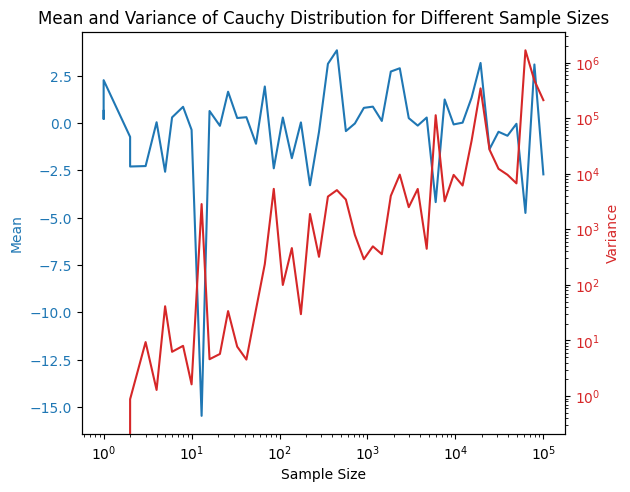

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate mean and variance of Cauchy distribution for different sample sizes
def calculate_mean_variance(sample_sizes):
    means = []
    variances = []
    
    for size in sample_sizes:
        samples = np.random.standard_cauchy(size)
        means.append(np.mean(samples))
        variances.append(np.var(samples))
    
    return means, variances

# Define sample sizes on a logarithmic scale
sample_sizes = np.logspace(0, 5, num=50, dtype=int)

# Calculate mean and variance for the sample sizes
means, variances = calculate_mean_variance(sample_sizes)

# Plot the results with split y-axes
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Sample Size')
ax1.set_ylabel('Mean', color=color)
ax1.plot(sample_sizes, means, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xscale('log')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Variance', color=color)
ax2.plot(sample_sizes, variances, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xscale('log')
ax2.set_yscale('log')

fig.tight_layout()
plt.title('Mean and Variance of Cauchy Distribution for Different Sample Sizes')
plt.show()

This shows that for ever larger values of sample size, the mean does not converge and the variance simply grows.

#### 9.1.2 Bayesian statistics

In Bayesian statistics we defined the conditional probability (see Week 2).

The conditional probability $P(A|B)$ is the probability of an event $A$ given that $B$ is true.

Bayes' theorem states that

$$P(A|B)P(B) = P(A~{\rm and}~B) = P(B|A)P(A),$$

and hence

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}.$$

It is often helpful to express $P(B)$ in terms of whether event $A$ is true or not (with $\overline{A}$ denoting 'not $A$' as before), which gives

$$P(B) = P(B|A)P(A) + P(B|\overline{A})P(\overline{A}) = P(B|A)P(A) + P(B|\overline{A})[1-P(A)],$$

and hence by inserting in the previous equation

$$P(A|B) = \frac{P(B|A)P(A)}{P(B|A)P(A) + P(B|\overline{A})[1-P(A)]}.$$

#### 9.1.3 Subjective probability

Bayes' theorem can be applied in a way to interpret how a given result strengthens (or weakens) the degree of belief in a given theory:

$$P({\rm theory}\,|\,{\rm result})=\frac{P({\rm result}\,|\,{\rm theory})}{P({\rm result})}P({\rm theory}).$$

The subjective part lies in the assignment of the probability of the theory being true $P({\rm theory})$.

The interpretation is as follows: if a given result is forbidden by a theory, i.e. $P({\rm result}\,|\,{\rm theory})=0$, then its observation disproves the theory, i.e. $P({\rm theory}\,|\,{\rm result})=0$.
Similarly, if the result is predicted to be unlikely by the theory, its observation reduces the degree of belief in the theory.

If, on the other hand, a result is predicted to be highly likely by the theory, it can strengthen the degree of belief in the theory.
However, there are two cases to consider, for which it is useful to consider the previously discussed replacement:

$$P({\rm theory}\,|\,{\rm result})=\frac{P({\rm result}\,|\,{\rm theory})}{P({\rm result}\,|\,{\rm theory})P({\rm theory})+P({\rm result}\,|\,{\rm not~theory})[1-P({\rm theory})]}P({\rm theory}).$$

If a result is equally likely regardless of whether or not the theory is true, i.e. $P({\rm result}\,|\,{\rm theory})=P({\rm result}\,|\,{\rm not~theory})$, there is no information gain as this results in $P({\rm theory}\,|\,{\rm result})=P({\rm theory}).$

The other extreme is that the result is much more likely to occur if the theory is true, i.e. $P({\rm result}\,|\,{\rm theory})\gg P({\rm result}\,|\,{\rm not~theory})$, which leads to the observation of the result being highly predictive as $P({\rm theory}\,|\,{\rm result})\approx 1$.

### 9.2 Confidence intervals in estimation

Suppose we want to know the true value of a parameter $\mu$, having made a measurement with result $x$ and resolution $\sigma$. One might be tempted to then say '$\mu$ lies within $x-\sigma$ and $x+\sigma$ with 68% confidence and within $x-2\sigma$ and $x+2\sigma$ with 95% confidence. While this works in some cases, it is not generally true.

##### Example: Interpreting measurements

Suppose you measure the weight of an object with a set of scales. These have a measurement error that grows with the weight of the object. Also, they give a biased reading with the bias increasing with the weight of the object.

You can calibrate both resolution and bias of the measurement, so in Bayesian terms, we can determine $P({\rm result}|{\rm theory})$ for any given theory, which in this case corresponds to the true weight of the object.

What we cannot extract in a straightforward way is how to get a good estimate (including uncertainties) of the true weight based on a measurement, or how to get $P({\rm theory}|{\rm result})$.

#### 9.2.1 Confidence belt construction

The solution to this issue lies in the construction of confidence belts.
To do this we approach the problem from the opposite and maybe less intuitive direction.
For a given value of the parameter $\mu$ there is a probability distribution function for the measured value $x$: $P(x;\mu)$. When describing a conventional measurement, this can be a Gaussian function with mean $\mu$ and the standard deviation equal to the measurement resolution $\sigma$. For a counting experiment it would be a Poisson distribution with mean $\mu$. In general, it will likely peak near $x=\mu$ and fall off to either side.

Having this function, we can construct a confidence interval and for the sake of illustration we assume a 90% central interval. This interval means that for a given value of the parameter $\mu$ the measured value $x$ will lie with 90% probability in the interval from $x_-$ to $x_+$. Or, equivalently, for many measurements with $\mu$ being the true value, 90% of the measured values will lie in said interval.

For different values of $\mu$, we will obtain different values of $x_-$ and $x_+$. Hence $x_\pm$ can be considered functions of $\mu$. The following figure shows an illustration of this situation. The region between the two curves is called confidence belt. For each value of $\mu$ it has a horizontal coverage of 90% confidence level.

<img src="images/Confidence_90_belt.png" width=60% >

The question now becomes, how to relate this to a given measurement outcome $x$. All of the previous figure can be constructed prior to making a measurement, provided we know the probability density function, e.g. through knowledge of the experimental resolution. This was all based on a horizontal construction. Having measured a particular value $x$, we can add a vertical line at the measured value. This identifies two points on the vertical parameter axis through the intersections of the line of the measured value with the boundaries of the confidence belt.

The intersection with the $x_-$ curve gives a value of $\mu$ for which $x$ is the appropriate $x_-$. This is the desired upper limit $\mu_+$. This means that if the real value of $\mu$ is greater than or equal to $\mu_+$, then the probability of getting a measurement smaller than this is 5% or less. Analogously, we can deduce $\mu_-$ from the intersection with the $x_+$ curve. We therefore quote the 90% confidence interval for the true value $\mu$ as the range $\mu_-$ to $\mu_+$ as shown in the following figure.

<img src="images/Confidence_90.png" width=60% >

#### 9.2.2 Interpretation

We can now make the statement that the true value of $\mu$ lies between $\mu_-$ and $\mu_+$ with 90% probability.
Note that this is only a statement about the boundaries $\mu_-$ and $\mu_+$ and not about $\mu$ itself!

A given statement from such a construction at a confidence level of say 90%, e.g. the electron mass lies between $510$ and $515~{\rm keV}/c^2$, is either right or wrong. However, taking a large number of such statements, 90% of them will be true. This provides a powerful test of the reliability of uncertainties quoted in different scientific communities. 

#### 9.2.3 Gaussian confidence intervals

In the case of Gaussian distribution functions with constant mean and standard deviation, the construction becomes very simple. The $x_-$ and $x_+$ curves become straight lines and the limits are obtained simply by $\mu_\pm=x\pm n\sigma$, where $n=1$ for 68% confidence level, $n=1.64$ for 90% confidence level, and so on.

The following code produces some of the most common numbers.

In [14]:
import numpy as np
from scipy.stats import norm
from math import ceil

def confidence_level_from_sigma(sigma):
    """Calculate the confidence level (CL) corresponding to a given range +/- n sigma."""
    return norm.cdf(sigma) - norm.cdf(-sigma)

def sigma_from_confidence_level(confidence_level):
    """Calculate the +/- n sigma range corresponding to a given confidence level (CL)."""
    return norm.ppf(1 - 0.5 * (1 - confidence_level))

def print_sigma_to_cl_table():
    """Print a table of sigma values and their corresponding confidence levels."""
    print(f'{"sigma":<6} | {"Confidence Level":<18} | {"Description":<20}')
    print('-----------------------------------------------')
    sigma_values = [1, 2, 3, 4, 5]
    descriptions = ['68%', '95%', '99.7%', '< 1 in 10,000', '< 1 in 1,000,000']
    
    for sigma, description in zip(sigma_values, descriptions):
        cl = confidence_level_from_sigma(sigma)
        error_margin = 1 - cl
        significant_digits = abs(ceil(np.log10(error_margin))) + 2
        print(f'{sigma:<6} | {cl:<18.{significant_digits}f} | {description:<20}')

def print_cl_to_sigma_table():
    """Print a table of confidence levels and their corresponding sigma values."""
    print()
    print(f'{"Confidence Level (%)":<18} | {"sigma":<6}')
    print('------------------------')
    confidence_levels = [0.90, 0.95, 0.99, 0.999, 0.9999, 0.99999, 0.999999]

    
    for cl in confidence_levels:
        sigma = sigma_from_confidence_level(cl)
        print(f'{cl*100:<20.4f} | {sigma:<6.2f}')
    

# Execute the functions to print the tables
print_sigma_to_cl_table()
print_cl_to_sigma_table()

sigma  | Confidence Level   | Description         
-----------------------------------------------
1      | 0.68               | 68%                 
2      | 0.954              | 95%                 
3      | 0.9973             | 99.7%               
4      | 0.999937           | < 1 in 10,000       
5      | 0.99999943         | < 1 in 1,000,000    

Confidence Level (%) | sigma 
------------------------
90.0000              | 1.64  
95.0000              | 1.96  
99.0000              | 2.58  
99.9000              | 3.29  
99.9900              | 3.89  
99.9990              | 4.42  
99.9999              | 4.89  


### 9.3 Examples of confidence intervals

#### 9.3.1 Binomial confidence intervals

For Binomial distributions, events belong to exactly one of two classes, e.g. true or false, greater or smaller than a threshold etc. This applies to samples of finite size and so the observed events are discretely distributed. Contrary to that the true variable is continuous, e.g. the probability for an event to be true can take any value and even the expectation value, i.e. the probability multiplied by the sample size is not necessarily an integer.

##### Recall the Binomial distribution

$$P(k;p,n)=p^k(1-p)^{n-k}\frac{n!}{k!(n-k)!},$$

where $p$ is the probability of success, $n$ is the sample size, and $k$ is the number of successes for this sample.

The expectation value is

$$<k>=np.$$

In [17]:
import numpy as np
from scipy.stats import binom
from math import ceil

def cumulative_probability_from_trials(n, p, k):
    """Calculate the cumulative probability for k successes in n trials with success probability p."""
    return binom.cdf(k, n, p)

def trials_from_cumulative_probability(n, p, cumulative_probability):
    """Calculate the number of successes corresponding to a given cumulative probability."""
    return binom.ppf(cumulative_probability, n, p)

def print_trials_to_cumulative_probability_table(n, p):
    """Print a table of number of successes and their corresponding cumulative probabilities."""
    print(f'{"k<=X":<10} | {"Cumulative Probability":<25}')
    print('---------------------------------------------')
    for k in range(n + 1):
        cumulative_prob = cumulative_probability_from_trials(n, p, k)
        print(f'{k:<10} | {cumulative_prob:<25.20f}')

def print_cumulative_probability_to_trials_table(n, p):
    """Print a table of cumulative probabilities and their corresponding number of successes."""
    print()
    print(f'{"Cumulative Probability":<25} | {"Successes":<10}')
    print('---------------------------------------------')
    cumulative_probabilities = [0.90, 0.95, 0.99]
    
    for cumulative_prob in cumulative_probabilities:
        k = trials_from_cumulative_probability(n, p, cumulative_prob)
        print(f'{cumulative_prob:<25.2f} | {int(k):<10}')

# Parameters for the binomial distribution
n = 10  # number of trials
p = 0.5  # probability of success in each trial

print(f"Binomial distribution with n = {n} and p = {p}")
# Execute the functions to print the tables
print_trials_to_cumulative_probability_table(n, p)
print_cumulative_probability_to_trials_table(n, p)

Binomial distribution with n = 10 and p = 0.5
k<=X       | Cumulative Probability   
---------------------------------------------
0          | 0.00097656250000000000   
1          | 0.01074218750000000000   
2          | 0.05468750000000000000   
3          | 0.17187500000000000000   
4          | 0.37695312500000000000   
5          | 0.62304687500000000000   
6          | 0.82812500000000000000   
7          | 0.94531250000000000000   
8          | 0.98925781250000000000   
9          | 0.99902343750000000000   
10         | 1.00000000000000000000   

Cumulative Probability    | Successes 
---------------------------------------------
0.90                      | 7         
0.95                      | 8         
0.99                      | 9         


##### Construction of a Binomial confidence belt

Given that the distribution of events is discrete, the integrals used in the construction of confidence intervals have to be replaced by sums. Recall that for a central interval, for a given confidence level $C$, we have to determine 

$$\int_{-\infty}^{x_-}P(x)dx=\int_{x_+}^{\infty}P(x)dx=(1-C)/2.$$

The direct replacement would lead, for a given confidence level $C$, to

$$\sum_{k=0}^{k_-}P(k;p,n)=\sum_{k=k_+}^{n}P(k;p,n)=(1-C)/2.$$

In general the discrete nature of $k$ will prevent these equalities to be satisfied exactly. Therefore they have to be replaced by inequalities that guarantee that the confidence interval covered by the range $k_-$ to $k_+$ is _at least_ $C$. This is given by the following constructions

$$\sum_{k=0}^{k_+}P(k;p,n)\geq 1-(1-C)/2.$$

and

$$\sum_{k=k_-}^{n}P(k;p,n)\geq 1-(1-C)/2.$$

If we are to construct bands with $C=0.9$, these two equations mean that we have to construct one-sided intervals that each cover at least $0.95$.
Their intersection, i.e. the range $k_-$ to $k_+$ will then cover at least $0.9$.

Finally, if $m$ successes are observed, the limits on the true probability interval can be assigned with $p_-$ and $p_+$ given by

$$\sum_{k=m+1}^{n}P(k;p_+,n)= 1-(1-C)/2,$$

and

$$\sum_{k=0}^{m-1}P(k;p_-,n)= 1-(1-C)/2.$$

In practice, these are the outward-facing corners of the confidence belt at a position $k=m$. These are also known as the _Clopper-Pearson confidence limits_.

##### Example: Fraction of overseas students

Let's measure the number of overseas students in a course of $n=20$ students and use this as an estimate of the overall fraction of overseas students. Let's work with 90% confidence intervals.

##### Construction of a confidence belt based on these data

At first, let's just look at the construction for one given value of $p=0.3$.

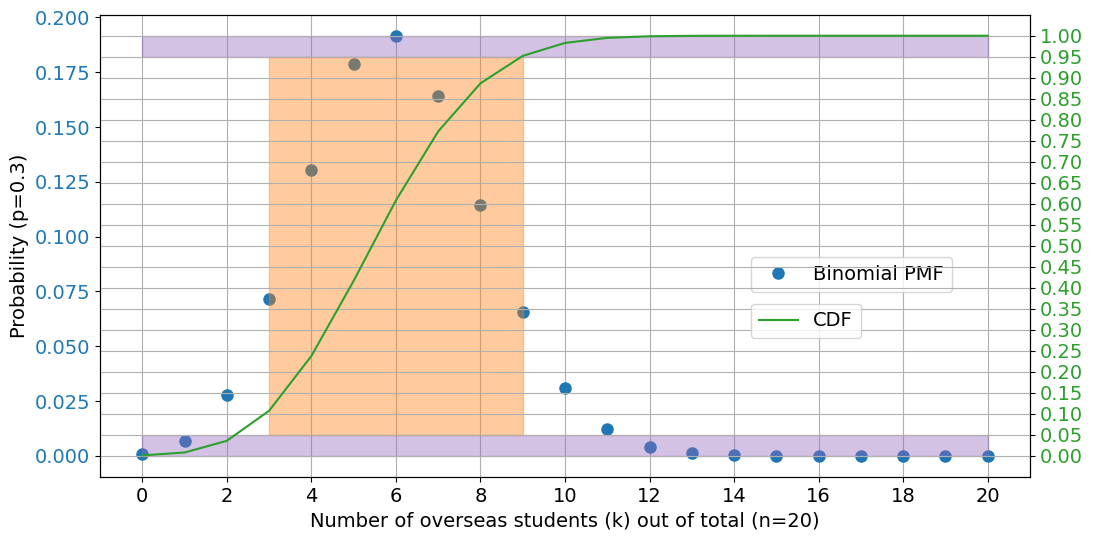

In [19]:
from typing import List
# Input parameters
total_students: int = 20
observed_overseas: int = 3
confidence_level: float = 0.90

# Create range of possible outcomes (0 to total_students)
possible_outcomes: List[int] = range(total_students + 1)

# Parameters for binomial distribution
n: int = total_students
p: float = 0.3    # Theoretical probability of overseas student

# Calculate confidence interval bounds
# For a two-sided interval, we split the remaining probability equally
alpha_lower: float = (1 - confidence_level) / 2
alpha_upper: float = 1 - alpha_lower

# Initialize and calculate binomial distribution
binomial_dist = binom(n, p)
# Calculate probability mass function (PMF) for each possible outcome
pmf_values = binomial_dist.pmf(possible_outcomes)
# Calculate cumulative distribution function (CDF)
cdf_values = np.cumsum(pmf_values, dtype=float)

# Find confidence interval boundaries
lower_bound: int = 0
upper_bound: int = total_students

# Determine the confidence interval by finding where CDF crosses our alpha levels
for i in possible_outcomes:
    if cdf_values[i] < alpha_lower:
        lower_bound = i
    if cdf_values[n-i] > alpha_upper:
        upper_bound = n-i

# Adjust lower bound (add 1 unless we're at exactly alpha_lower)
if lower_bound == 0 and cdf_values[0] > alpha_lower:
    lower_bound = 0
else:
    lower_bound += 1

# Create visualization
fig, pmf_axis = plt.subplots(figsize=(12, 6))
pmf_axis.set_xticks(possible_outcomes[0::2])
cdf_axis = pmf_axis.twinx()

# Create shaded regions for excluded areas (outside confidence interval)
excluded_regions = PatchCollection([
    Rectangle((0, 0), n, alpha_lower),
    Rectangle((0, alpha_upper), n, alpha_lower)
], alpha=0.4, color='tab:purple')

# Create shaded region for confidence interval
ci_region = PatchCollection([
    Rectangle((lower_bound, alpha_lower), 
             upper_bound-lower_bound, confidence_level)
], alpha=0.4, color='tab:orange')

# Add shaded regions to plot
cdf_axis.add_collection(excluded_regions)
cdf_axis.add_collection(ci_region)

# Plot PMF
pmf_axis.plot(possible_outcomes, pmf_values, 'o', 
              ms=8, label='Binomial PMF', color='tab:blue')
pmf_axis.tick_params(axis='y', labelcolor='tab:blue')
pmf_axis.legend(loc=[0.7, 0.4])

# Plot CDF
cdf_axis.plot(possible_outcomes, cdf_values, '-', 
              ms=8, label='CDF', color='tab:green')
cdf_axis.tick_params(axis='y', labelcolor='tab:green')
cdf_axis.legend(loc=[0.7, 0.3])

# Format axes
cdf_axis.set_yticks([x/20. for x in range(21)])
pmf_axis.grid(which='both', axis='x')
cdf_axis.grid(which='major', axis='y')
pmf_axis.set_xlabel('Number of overseas students (k) out of total (n=20)')
pmf_axis.set_ylabel('Probability (p=0.3)')

plt.show()

We can repeat this for a series of different probabilities to understand how this "high likelihood" region moves.

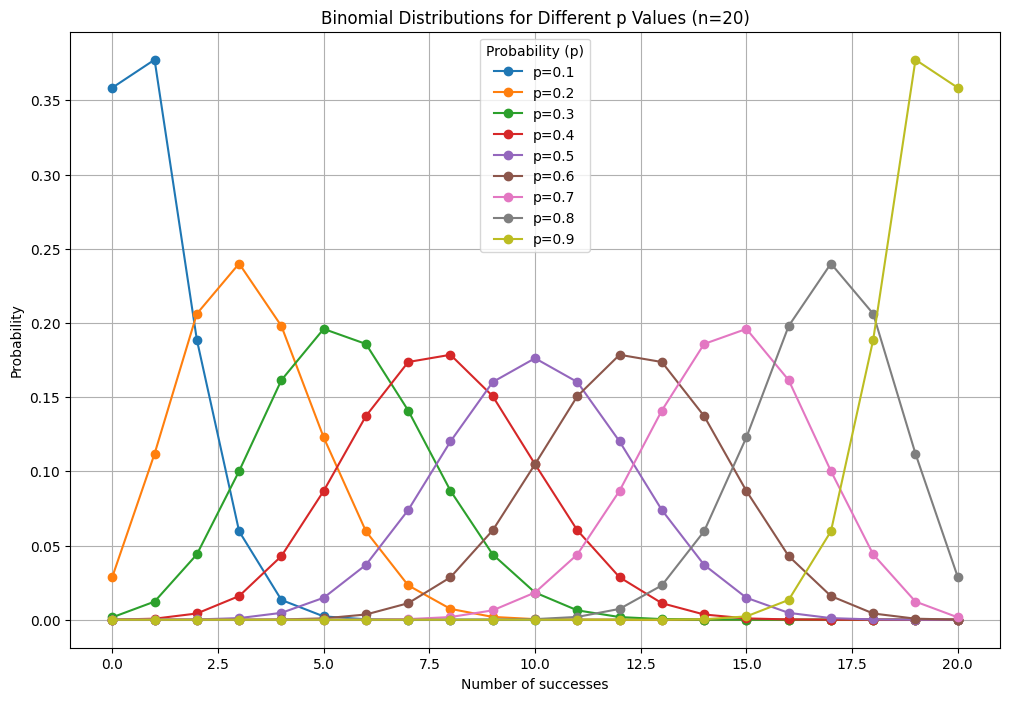

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 20  # Total number of trials
p_values = np.linspace(0.05, 0.95, 9)  # Probability values from 0.1 to 1

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot binomial distributions for different p values
for p in p_values:
    x = np.arange(0, n + 1)
    y = binom.pmf(x, n, p)
    ax.plot(x, y, marker='o', linestyle='-', label=f'p={p:.1f}')

# Configure plot
ax.set_xlabel('Number of successes')
ax.set_ylabel('Probability')
ax.set_title('Binomial Distributions for Different p Values (n=20)')
ax.legend(title='Probability (p)')
ax.grid(True)

# Show plot
plt.show()

#### Construction of Binomial upper and lower belts
The following three plots show the construction of the confidence belt first separated in one-sided intervals, which satisfy the inequalities discussed above, and finally their intersection.
The color shows the variation of the confidence level covered, which illustrates the steps.

Probability of overseas students: 0.05
Lower bound: 0.0
Upper bound: 20
Coverage probability: 1.0
Probability of overseas students: 0.3
Lower bound: 2.0
Upper bound: 20
Coverage probability: 0.9923627402258
Probability of overseas students: 0.5
Lower bound: 6.0
Upper bound: 20
Coverage probability: 0.9793052673339844


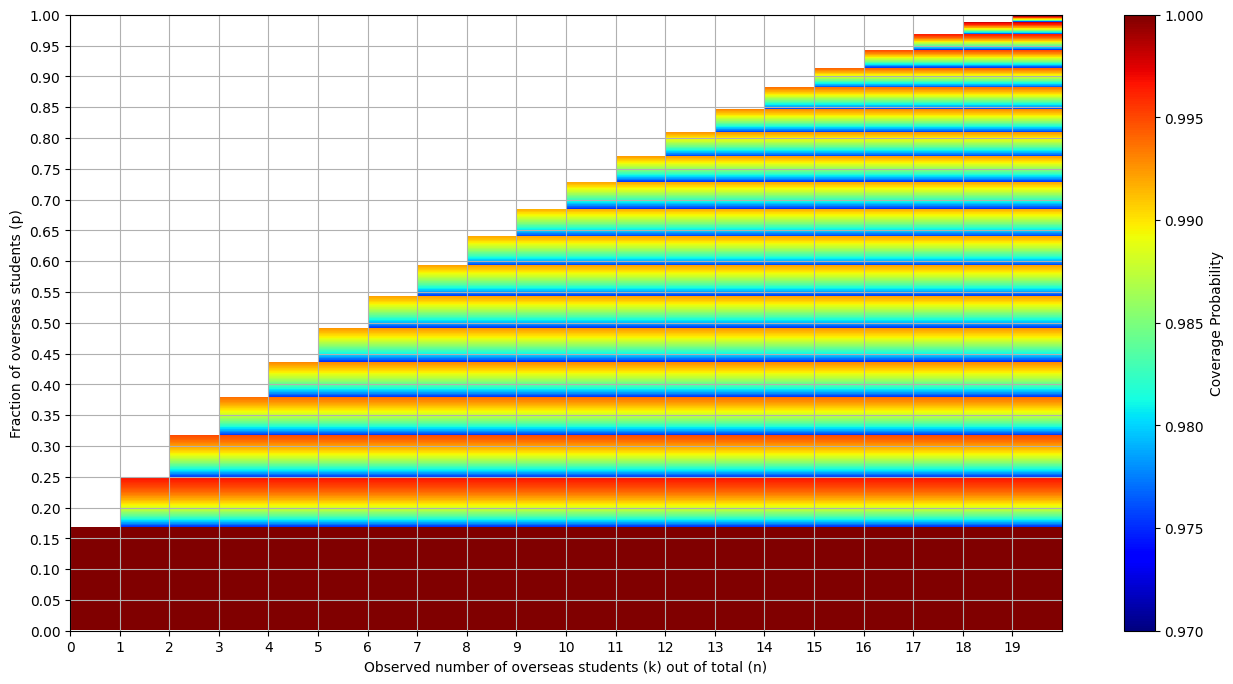

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from scipy.stats import binom
from typing import Tuple

def calculate_confidence_interval(confidence_level: float, n_total: int, prob: float) -> Tuple[float, float, float]:
    """
    Calculate the upper confidence interval for a binomial distribution.
    
    Args:
        confidence_level: The desired confidence level (e.g., 0.95 for 95%)
        n_total: Total number of trials (sample size)
        prob: Probability of success for each trial
    
    Returns:
        Tuple containing (lower bound, upper bound, actual coverage probability)
    """
    # Calculate lower bound using inverse CDF (quantile function)
    lower_bound = binom.ppf(0.5*(1-confidence_level), n_total, prob)
    # Upper bound is always the total number of trials
    upper_bound = n_total
    
    # Calculate actual coverage probability
    if lower_bound > 0:
        coverage = binom.cdf(upper_bound, n_total, prob) - binom.cdf(lower_bound-1, n_total, prob)
    else:
        coverage = binom.cdf(upper_bound, n_total, prob)
        
    return lower_bound, upper_bound, coverage

# Simulation parameters
n_points = 1000  # Number of probability points to evaluate
n_students = 20  # Total number of students
confidence_level = 0.95  # 95% confidence level

# Lists to store the confidence belt visualization data
belt_patches = []
coverage_probabilities = []

# Calculate confidence intervals for different probabilities
for i in range(1, n_points):
    # Ranges from 0 to 1 (excluding 0 to avoid division by zero)
    prob_overseas = i / n_points
    
    # Calculate confidence interval and coverage
    lower, upper, coverage = calculate_confidence_interval(
        confidence_level, n_students, prob_overseas
    )

    if i in [50,300,500,1000]:
        print(f"Probability of overseas students: {prob_overseas}")
        print(f"Lower bound: {lower}")
        print(f"Upper bound: {upper}")
        print(f"Coverage probability: {coverage}")

    # Create rectangle patch for visualization
    belt_patches.append(
        Rectangle((lower, prob_overseas), upper-lower, 1/n_points)
    )
    coverage_probabilities.append(coverage)

# Create confidence belt visualization
belt = PatchCollection(belt_patches, alpha=1.0, cmap='jet')
belt.set_array(np.array(coverage_probabilities))
belt.set_clim([0.97, 1])  # Set color scale for coverage probability

# Create and configure plot
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xlim(0, n_students)
ax.set_ylim(0, 1)
ax.add_collection(belt)

# Configure axes and labels
ax.set_yticks([x/20 for x in range(21)])
ax.set_xticks([x for x in range(n_students)])
ax.grid(which='both', axis='x')
ax.grid(which='major', axis='y')
ax.set_xlabel('Observed number of overseas students (k) out of total (n)')
ax.set_ylabel('Fraction of overseas students (p)')

plt.colorbar(belt, label='Coverage Probability')
plt.show()

The plot above can be read from bottom to top, i.e. with increasing $p$, as the lower edge of the interval stepping to the right as soon as the resulting coverage exceeds $0.95$. Therefore, it always reaches $0.95$ at the bottom of a band of the same $k$.

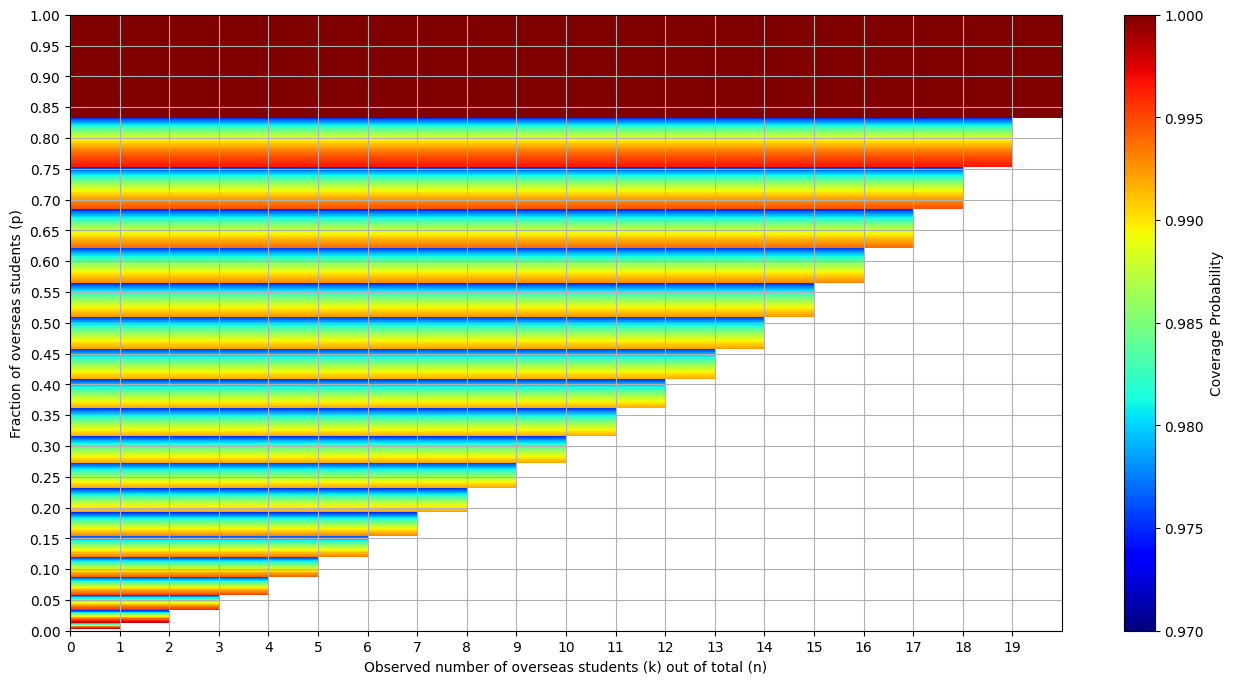

In [29]:
def get_lower_interval(cl: float, n: int, p: float) -> Tuple[float, float, float]:
    """
    Calculate the lower confidence interval for a binomial distribution.
    
    Args:
        cl: Confidence level (e.g., 0.95 for 95%)
        n: Total number of trials (sample size)
        p: Probability of success for each trial
    
    Returns:
        Tuple containing (lower bound, upper bound, actual coverage probability)
    """
    rm = 0
    rp = binom.ppf(0.5 * (1 - cl) + cl, n, p)
    if rm > 0:
        return rm, rp, binom.cdf(rp, n, p) - binom.cdf(rm - 1, n, p)
    else:
        return rm, rp, binom.cdf(rp, n, p)

# Simulation parameters
nSamples = 1000  # Defines granularity in y (probability)
nStudents = 20  # Total number of students
cl = 0.95  # Confidence level

# Lists to store the confidence belt visualization data
binom_patches = []
binom_colors = []

# Calculate confidence intervals for different probabilities
for i in range(1, nSamples):
    pOverseas = i / nSamples  # Translate into probability
    rm, rp, p = get_lower_interval(cl, nStudents, pOverseas)  # Use fast implementation
    # Define drawing object for confidence interval
    binom_patches.append(Rectangle((rm, pOverseas), rp - rm, 1.0 / nSamples))
    binom_colors.append(p)

# Create confidence belt visualization
binoms = PatchCollection(binom_patches, alpha=1.0, cmap='jet')  # Drawing object for complete belt
binoms.set_array(np.array(binom_colors))
binoms.set_clim([0.97, 1])  # Set color scale for coverage probability

# Create and configure plot
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xlim(0, nStudents)  # Set x-axis range
ax.set_ylim(0, 1)  # Set y-axis range
ax.add_collection(binoms)  # Draw belt

# Configure axes and labels
ax.set_yticks([x / 20 for x in range(21)])
ax.set_xticks([x for x in range(nStudents)])
ax.grid(which='both', axis='x')
ax.grid(which='major', axis='y')
ax.set_xlabel('Observed number of overseas students (k) out of total (n)')
ax.set_ylabel('Fraction of overseas students (p)')

plt.colorbar(binoms, label='Coverage Probability')
plt.show()

The plot above can be read from bottom to top, i.e. with increasing $p$, as the upper edge of the interval stepping to the right as soon as the resulting coverage would otherwise drop below $0.95$. Therefore, it always reaches $0.95$ at the top of a band of the same $k$.

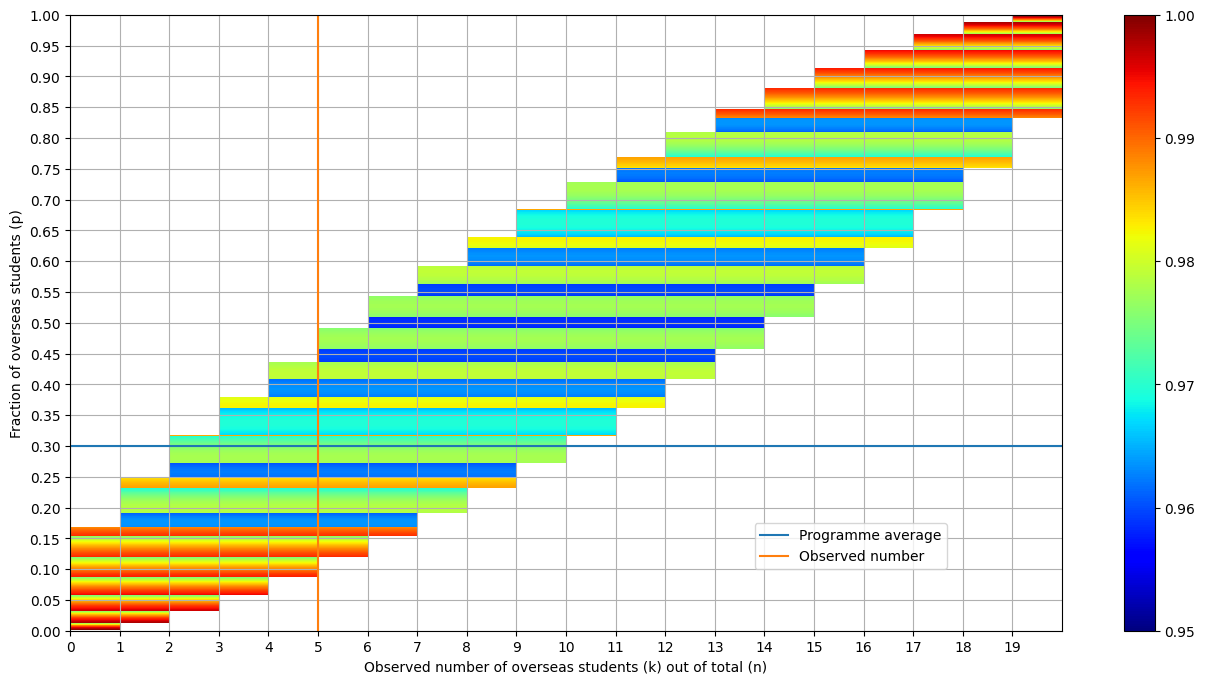

In [32]:
def calculate_confidence_interval(confidence_level: float, sample_size: int, 
                                probability: float) -> Tuple[float, float, float]:
    """
    Calculate the central confidence interval for a binomial distribution.
    
    Args:
        confidence_level: Desired confidence level (e.g., 0.95 for 95%)
        sample_size: Number of trials (n)
        probability: Success probability (p)
    """
    # Calculate lower and upper bounds using inverse CDF (quantile function)
    lower_bound = binom.ppf(0.5 * (1 - confidence_level), sample_size, probability)
    upper_bound = binom.ppf(0.5 * (1 - confidence_level) + confidence_level, sample_size, probability)
    
    # Calculate actual coverage probability
    if lower_bound > 0:
        coverage = binom.cdf(upper_bound, sample_size, probability) - binom.cdf(lower_bound - 1, sample_size, probability)
    else:
        coverage = binom.cdf(upper_bound, sample_size, probability)
        
    return lower_bound, upper_bound, coverage

# Set up parameters
n_points = 2000  # Number of probability points to evaluate
confidence_level = 0.95  # 95% confidence level
n_students = 20  # Total number of students
n_overseas = 5   # Observed number of overseas students

# Create confidence belt
belt_patches = []
coverage_probabilities = []

# Calculate confidence intervals for different probability values
for i in range(1, n_points):
    prob_overseas = i / n_points
    lower, upper, coverage = calculate_confidence_interval(confidence_level, n_students, prob_overseas)
    
    # Create rectangle for this confidence interval
    belt_patches.append(Rectangle((lower, prob_overseas), upper - lower, 1/n_points))
    coverage_probabilities.append(coverage)

# Create visualization
fig, ax = plt.subplots(figsize=(16, 8))

# Create and configure confidence belt collection
belt = PatchCollection(belt_patches, alpha=1.0, cmap='jet')
belt.set_array(np.array(coverage_probabilities))
belt.set_clim([0.95, 1])  # Set color scale for coverage probability

# Set up plot
ax.set_xlim(0, n_students)
ax.set_ylim(0, 1)
ax.add_collection(belt)

# Configure axes
ax.set_yticks([x/20 for x in range(21)])
ax.set_xticks([x for x in range(n_students)])
ax.grid(which='both', axis='x')
ax.grid(which='major', axis='y')
ax.set_xlabel('Observed number of overseas students (k) out of total (n)')
ax.set_ylabel('Fraction of overseas students (p)')

# Add reference lines
ax.plot([0, n_students], [0.3]*2, label='Programme average')
ax.plot([n_overseas]*2, [0, 1], label='Observed number')
ax.legend(loc=[0.69, 0.10])

# Add colorbar showing coverage probability
plt.colorbar(belt)
plt.show()

#### 9.3.2 Poisson confidence intervals

The procedure for a Poisson process is rather similar to that of a Binomial distribution with the main difference that the range of possible values is not limited by a total number but goes to infinity (this is exactly how the distribution is defined, by taking the $n\to\infty$ limit of the Binomial distribution function).

##### Recall the Poisson distribution

For a given number of observed events $k$ and an expectation value of $\lambda$, the Poisson probability is given by

$$P(k;\lambda)=\frac{e^{-\lambda}\lambda^k}{k!}.$$

##### Construction of Poisson intervals

To construct central 90% intervals, we need the greatest value of $N_-$ that satisfies for a given $\lambda$

$$\sum_{k=N_-}^\infty P(k;\lambda)\geq 0.95.$$

This is equivalent to

$$\sum_{k=0}^{N_--1} P(k;\lambda) \leq 1 - 0.95 = 0.05,$$

which is easier to calculate.

Accordingly, we require the smallest $N_+$ that satisfies for a given $\lambda$

$$\sum_{k=0}^{N_+} P(k;\lambda) \geq 0.95.$$

##### Practical example

One useful number to remember is the 90% upper limit for the case that the number of observed events is 0; this limit is $\lambda_+=2.3$. Hence, in any counting experiment that yields an obervation of 0, we can be 90% sure that the true number of events is no greater than $2.3$.

The 90% upper limit corresponds to the left-hand side of an 80% central-interval belt. This is shown below where the $2.3$ can be read off as the top of the belt at its left-hand end at $k=0$.

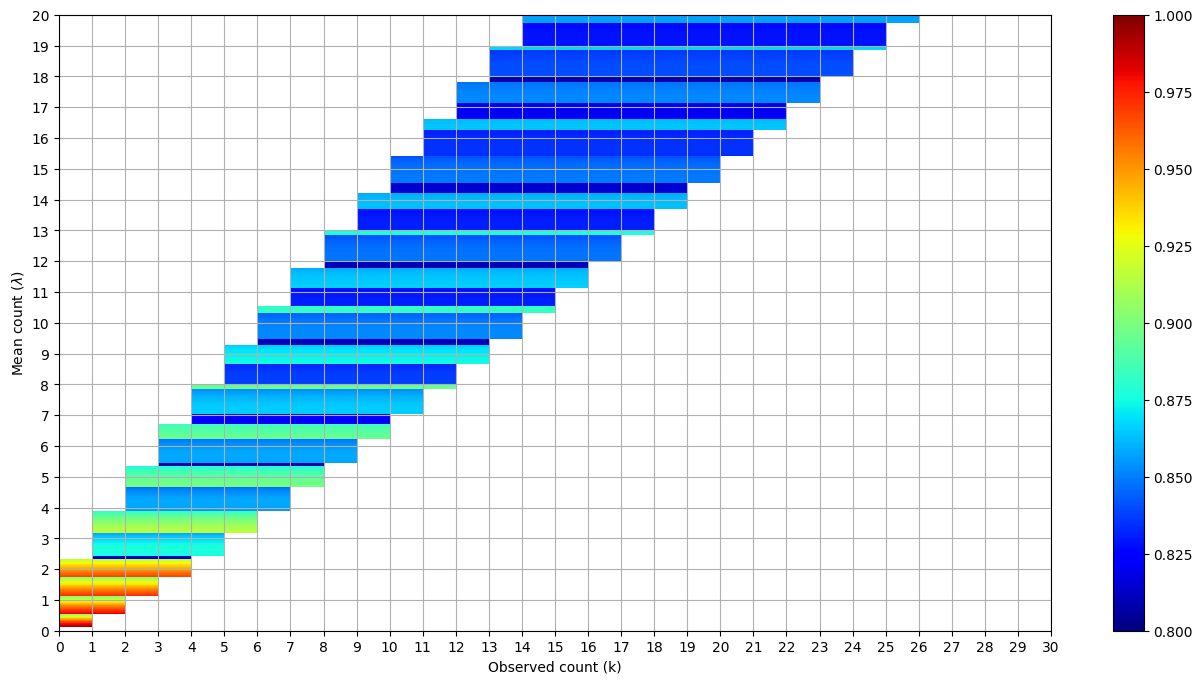

In [39]:
from scipy.stats import poisson
from typing import Tuple
from matplotlib.cm import jet

def get_central_interval(confidence_level: float, mean: float) -> Tuple[float, float, float]:
    """
    Calculate central confidence interval for Poisson distribution
    Args:
        confidence_level: Target coverage probability (e.g. 0.8 for 80%)
        mean: Mean value λ of Poisson distribution
    Returns:
        Lower bound, upper bound, and actual coverage probability
    """
    # Find symmetric quantiles for confidence interval
    k_min = poisson.ppf(0.5*(1-confidence_level), mean)
    k_max = poisson.ppf(0.5*(1-confidence_level) + confidence_level, mean)
    
    # Calculate actual coverage probability, handling edge case k_min=0
    if k_min > 0:
        coverage = poisson.cdf(k_max, mean) - poisson.cdf(k_min-1, mean)
    else:
        coverage = poisson.cdf(k_max, mean)
        
    return k_min, k_max, coverage

# Set parameters for confidence belt calculation
confidence_level = 0.8 
n_samples = 1000  # Number of λ values to sample
max_mean = 20.    # Maximum λ value to plot
max_counts = 30   # Maximum observed counts to plot

# Generate patches for each λ value
poisson_patches = []
coverage_values = []

for i in range(1, n_samples):
    # Calculate mean value for this sample
    mean = max_mean * i / n_samples
    
    # Get confidence interval bounds and coverage
    k_min, k_max, coverage = get_central_interval(confidence_level, mean)
    
    # Create rectangle patch for this interval
    height = max_mean/n_samples
    poisson_patches.append(Rectangle((k_min, mean), k_max-k_min, height))
    coverage_values.append(coverage)

# Create patch collection with color mapping
confidence_belt = PatchCollection(poisson_patches, alpha=1.0, cmap=jet)
confidence_belt.set_array(np.array(coverage_values))
confidence_belt.set_clim([0.8, 1])

# Set up plot
fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlim(0, max_counts)
ax.set_ylim(0, max_mean)

# Add confidence belt to plot
ax.add_collection(confidence_belt)

# Configure axes
ax.set_yticks([max_mean*x/20. for x in range(21)])
ax.set_xticks([x for x in range(max_counts+1)])
ax.grid(which='both', axis='x')
ax.grid(which='major', axis='y')
ax.set_xlabel('Observed count (k)')
ax.set_ylabel(r"Mean count ($\lambda$)")

plt.colorbar(confidence_belt)
plt.show()

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://licensebuttons.net/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>